<a href="https://colab.research.google.com/github/misbahsy/Learning/blob/master/BayesianOpt_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=3f462ada06acf89e755a53a92708ae5e4e808faf60eca8b809f93bba7826e5f7
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [2]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [3]:
def target(x):
  return np.exp(-(x-2)**2) + np.exp(-(x - 6)**2/10) + 1/(x**2 + 1)

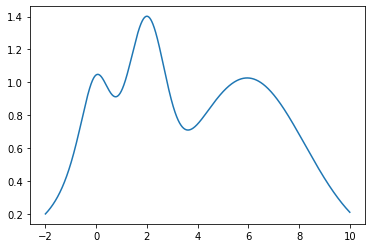

In [4]:
x = np.linspace(-2, 10, 10000).reshape(-1,1)
y = target(x)

plt.plot(x, y)

In [5]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state = 27 )

In [7]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|  3        |  0.9553   |  6.825    |
|  4        |  0.5717   |  8.416    |
|  5        |  1.141    |  2.601    |
|  6        |  0.2548   |  9.753    |
|  7        |  0.4906   |  8.718    |


In [8]:
def posterior(optimizer, x_obs, y_obs, grid):
  optimizer._gp.fit(x_obs, y_obs)

  mu, sigma = optimizer._gp.predict(grid, return_std=True)
  return mu, sigma

In [9]:
def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

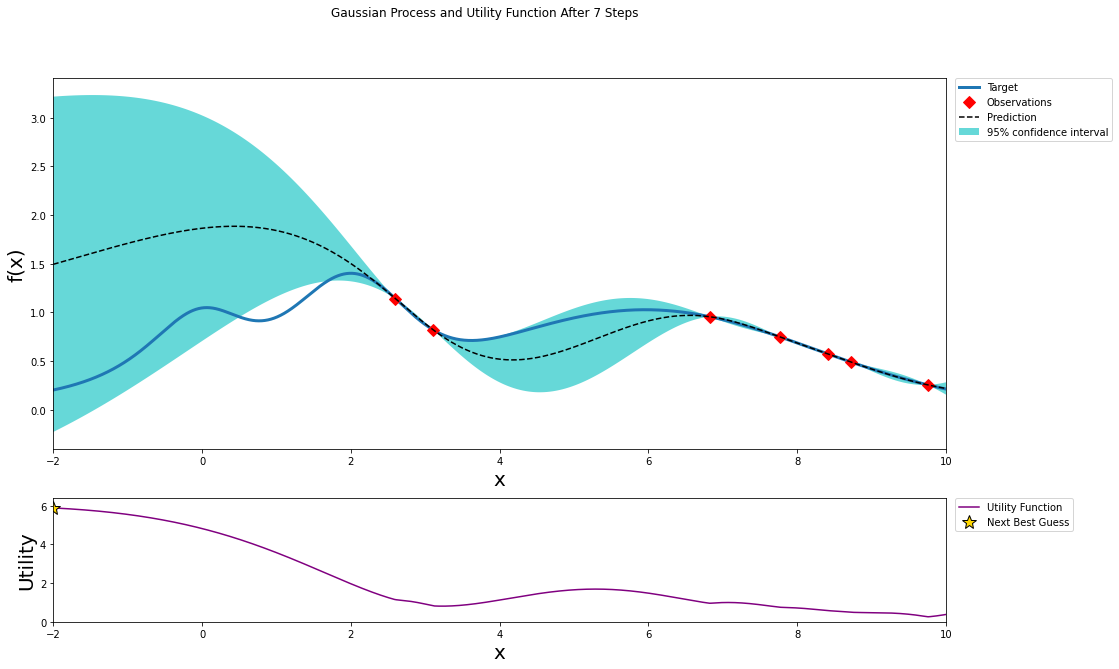

In [10]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.2017   | -2.0      |


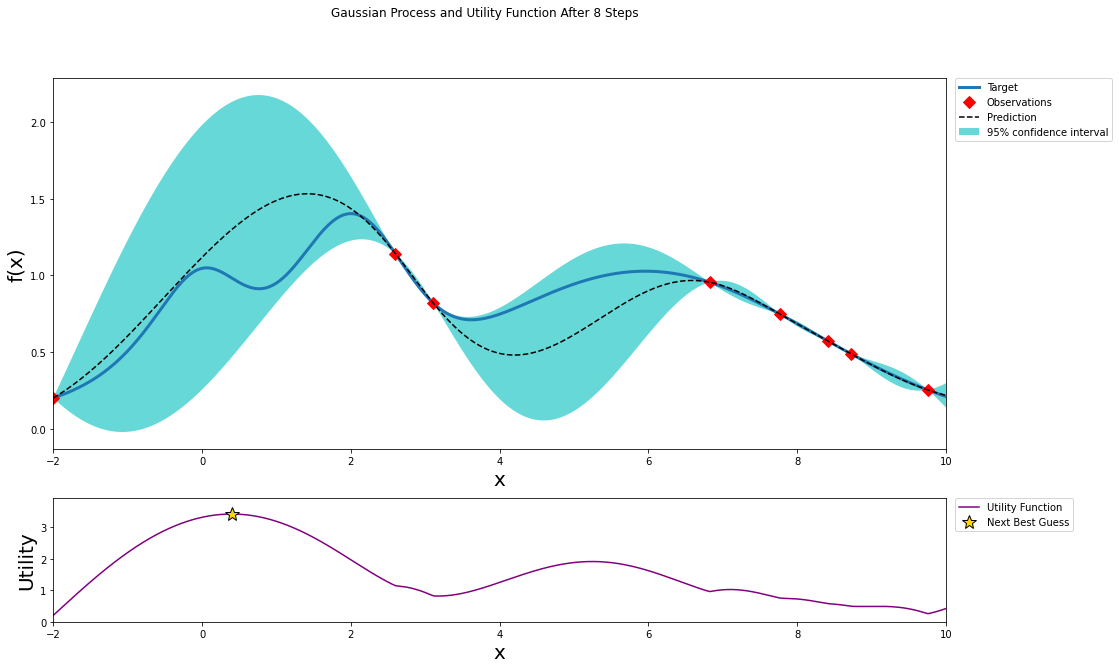

In [11]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  9        |  0.9833   |  0.3985   |


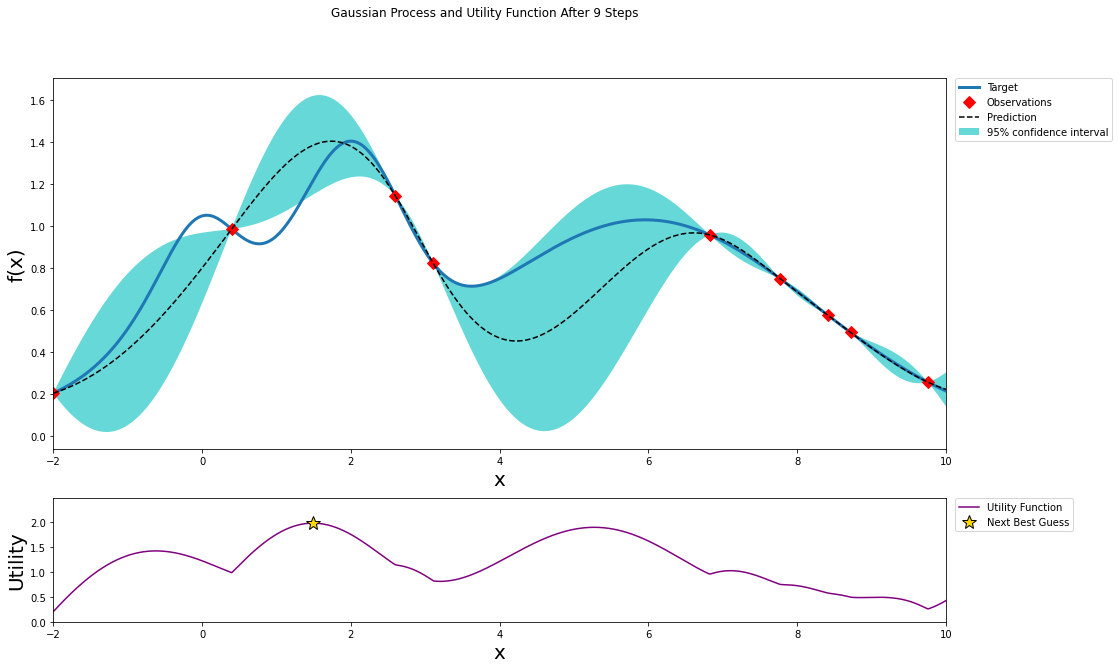

In [12]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  10       |  1.213    |  1.49     |


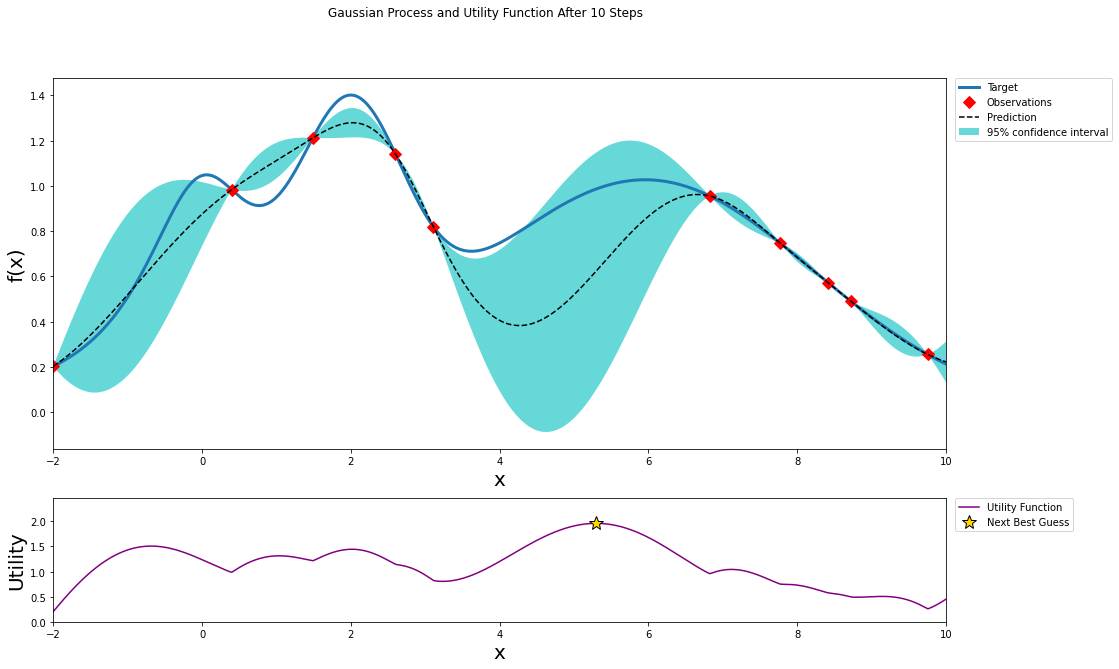

In [13]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  11       |  0.9862   |  5.297    |


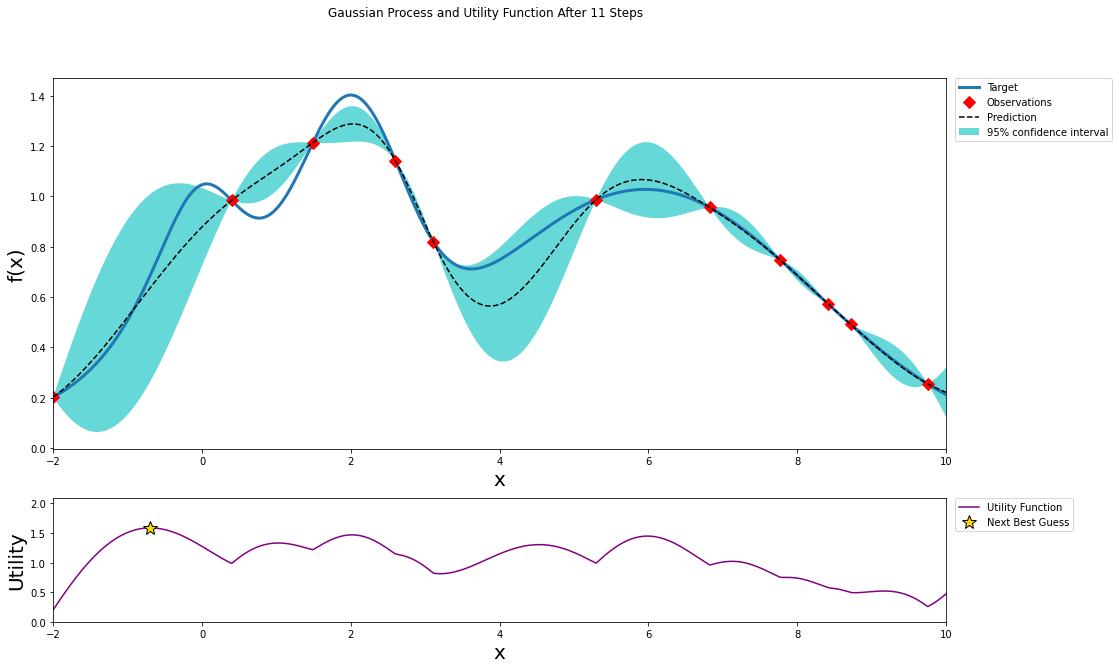

In [14]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  12       |  0.6857   | -0.6959   |


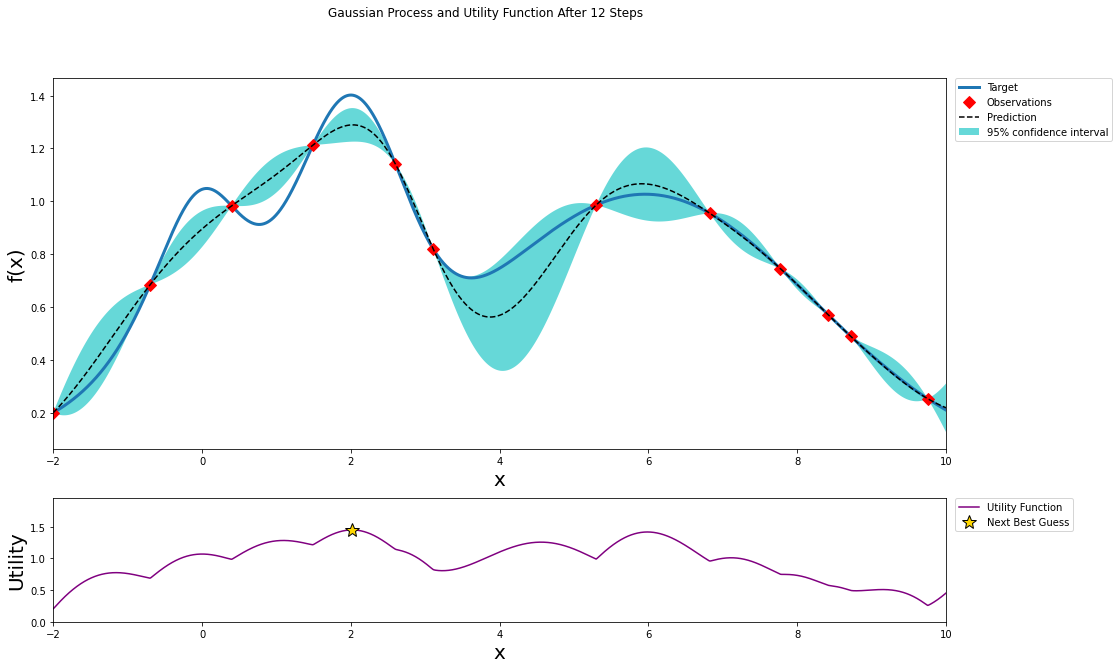

In [15]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  13       |  1.402    |  2.019    |


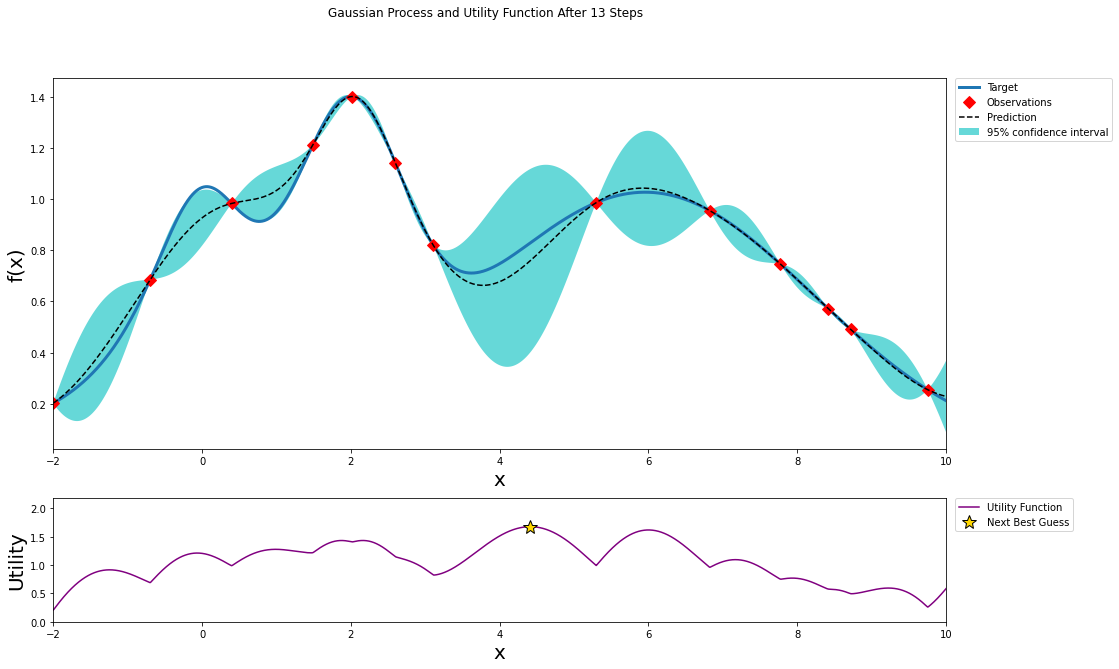

In [16]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  14       |  0.8289   |  4.412    |


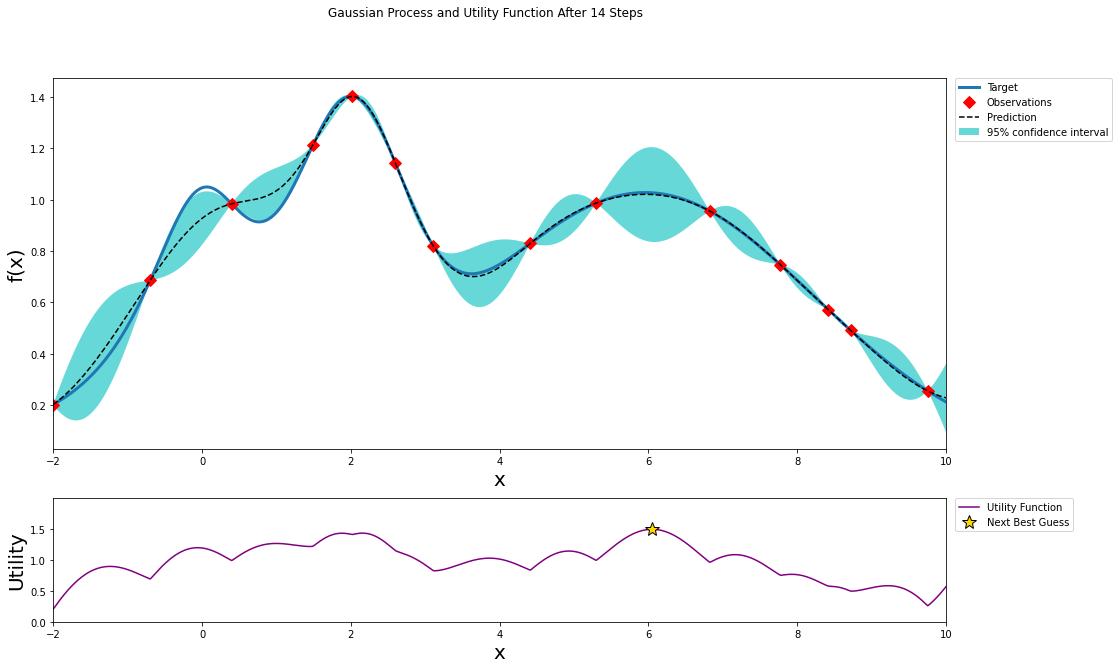

In [17]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  15       |  1.026    |  6.05     |


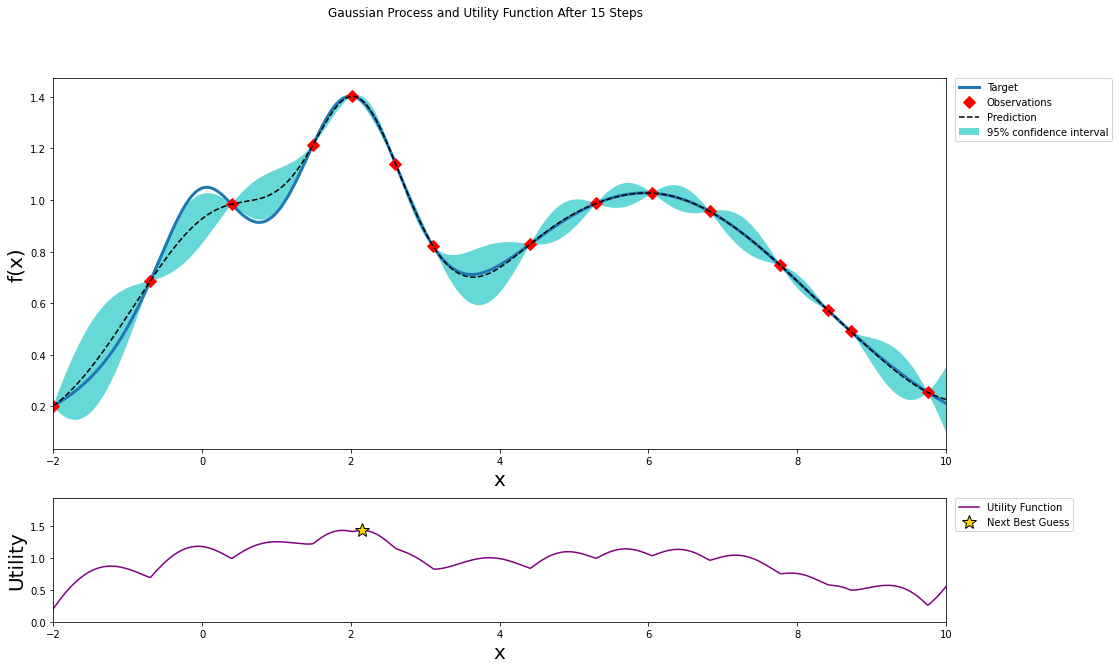

In [18]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  16       |  1.383    |  2.151    |


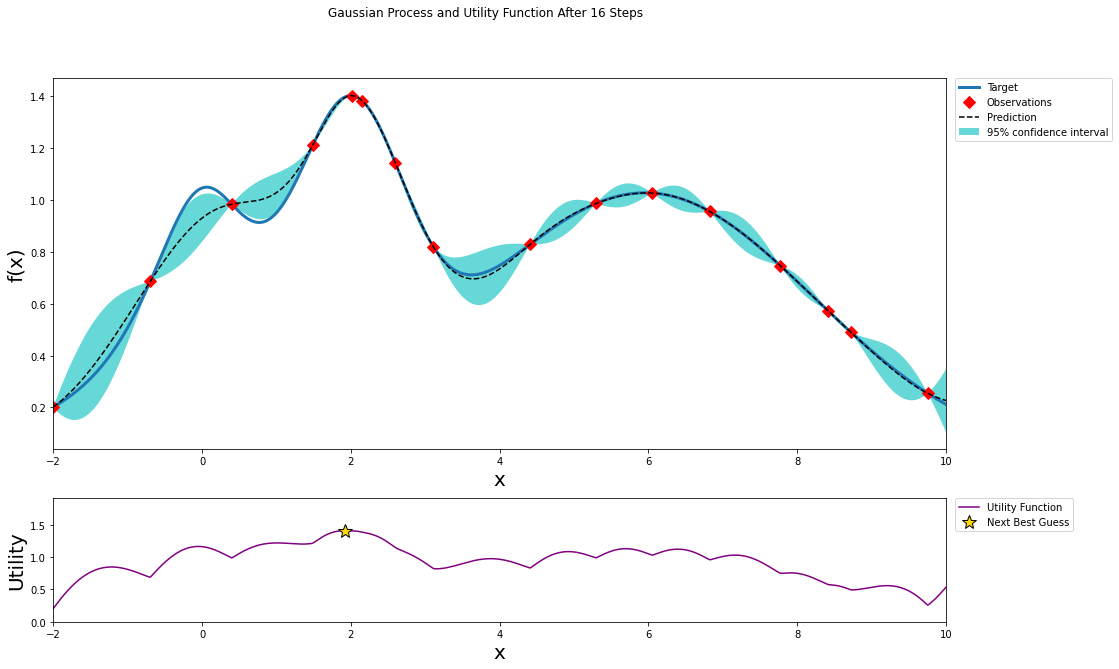

In [19]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  17       |  1.397    |  1.924    |


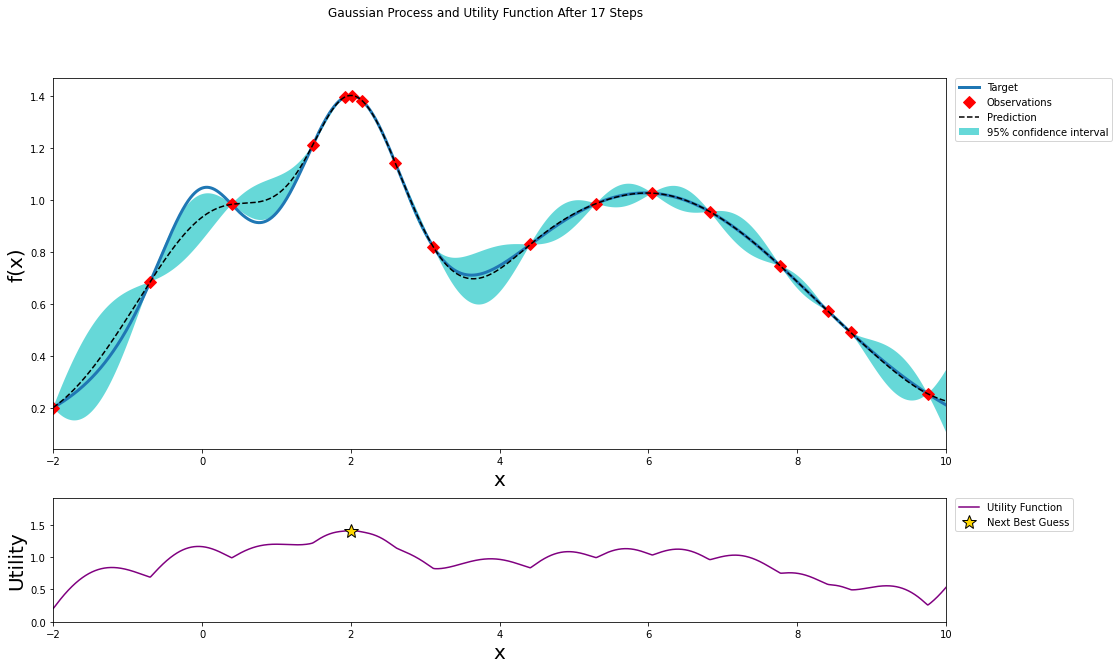

In [20]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  18       |  1.402    |  2.008    |


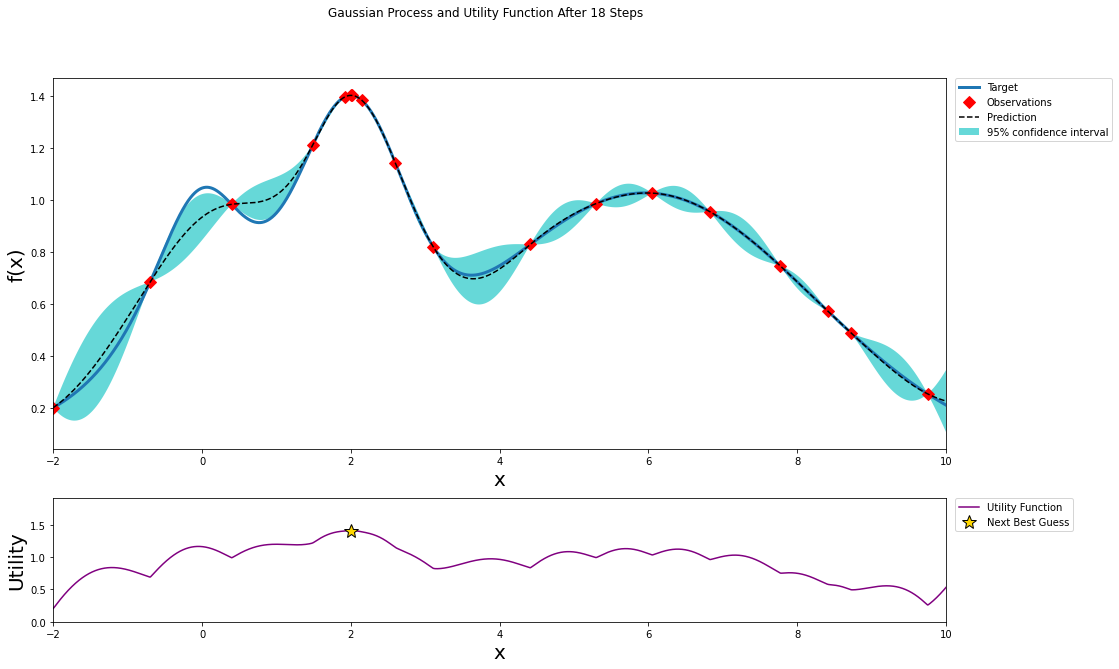

In [21]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  19       |  1.402    |  2.003    |


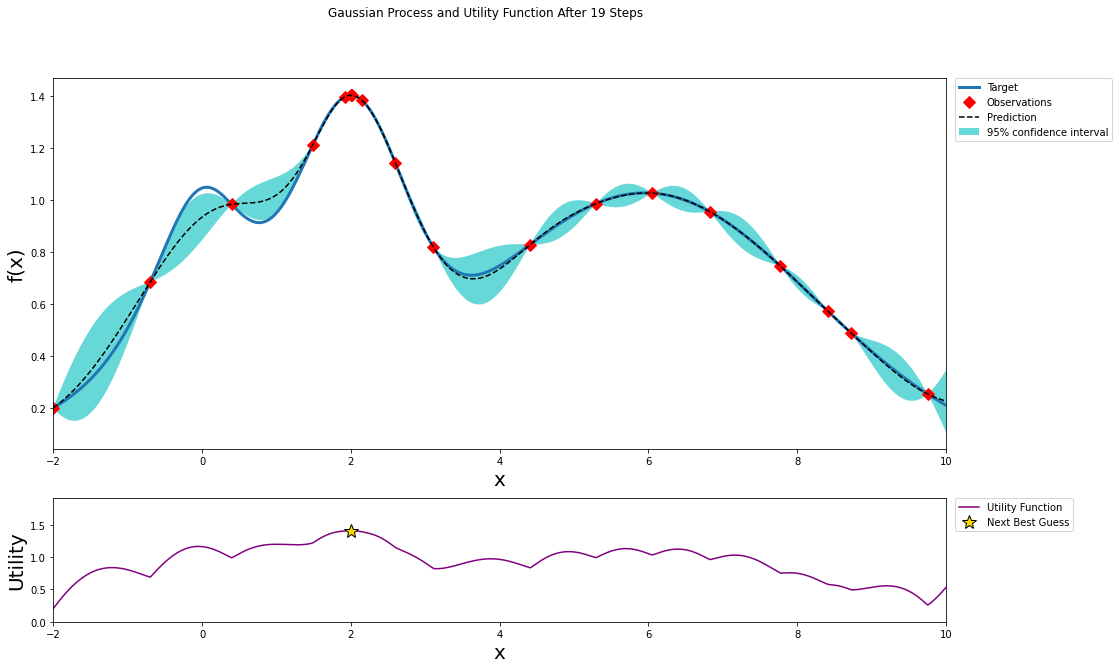

In [22]:
optimizer.maximize(init_points=0, n_iter=1, kappa=1)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  20       |  1.019    | -0.126    |


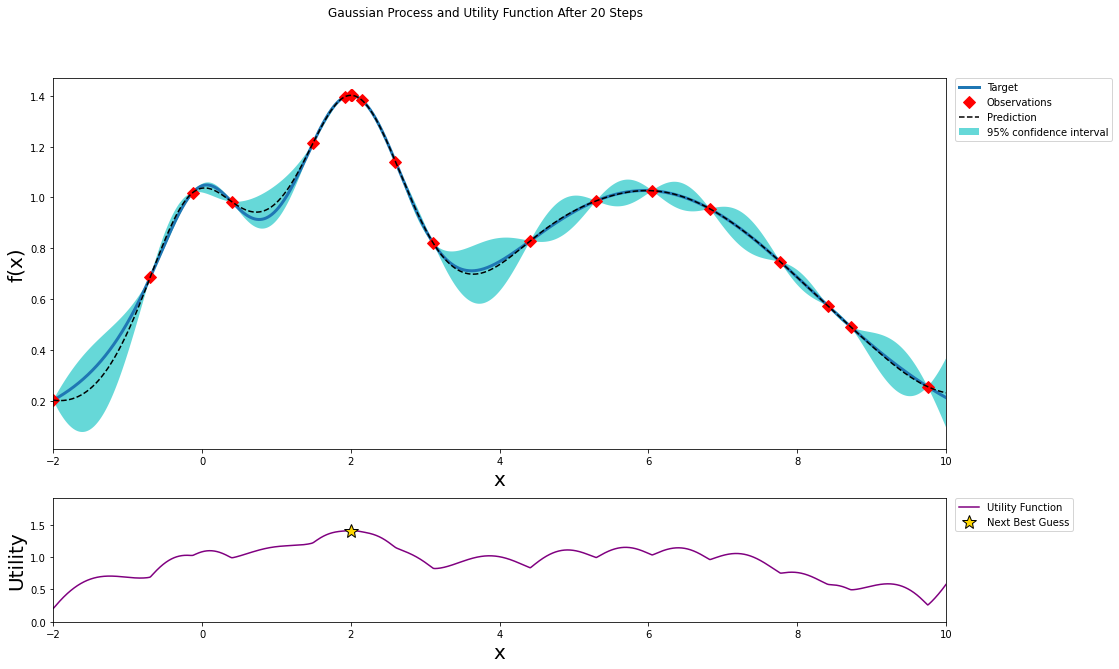

In [23]:
optimizer.maximize(init_points=0, n_iter=1, kappa=15)
plot_gp(optimizer, x, y)